In [22]:
import os 
import sys
sys.path.append("../src")

from PIL import Image
from dotenv import load_dotenv
import matplotlib.pyplot as plt
load_dotenv()   # This loads the variables from a `.env` file in the current directory

from llms.queryllm import QueryLLM

In [12]:
##################################
### Load API Keys and Metadata ###
##################################
TOGEHER_API_KEY:str      = os.getenv("TOGEHER_API_KEY")
OPENAI_API_KEY:str       = os.getenv("OPENAI_API_KEY") 
parameters:dict[str,int] = {"temperature":0,
                            "max_tokens":None,
                            "timeout":10,
                            "max_retries":10,
                            "max_tokens":100}

## API Call for Text-only

In [3]:
llm = QueryLLM(provider="togetherai",
               api_key=TOGEHER_API_KEY,
               model="meta-llama/Llama-3.3-70B-Instruct-Turbo-Free",
               cache="langchain.db",
               parameters=parameters)

response = llm.simple_query(human_message="Space Marine",
                            system_prompt="Answer the question")
print(response)

The Space Marines are a central part of the Warhammer 40,000 science fantasy universe created by Games Workshop. They are genetically-engineered superhuman warriors who serve as the Imperium of Man's most elite and powerful fighting force.

Here are some key facts about Space Marines:

1. **Genetic Engineering**: Space Marines are created through a process of genetic engineering, where young recruits undergo extensive surgery and implantation of advanced technology to enhance their physical and mental abilities.
2. **Power Armor**:


## API Call for Image-Text
#### Call API with image hosted somewhere else

In [13]:
#!wget https://www.smartcitiesworld.net/AcuCustom/Sitename/DAM/019/Parsons_PR.jpg
image_url= 'https://www.smartcitiesworld.net/AcuCustom/Sitename/DAM/019/Parsons_PR.jpg'
message = [{"type": "text", "text": "describe the weather in this image"},
           {"type": "image_url", "image_url": {"url": image_url}},
          ]

llm = QueryLLM(provider="openai",
               api_key=OPENAI_API_KEY,
               model="gpt-4o-mini",
               cache="langchain.db",
               parameters=parameters)

response = llm.simple_query(human_message=message,system_prompt="Anwer the question")
print(response)

The image shows a busy street with a green traffic light, indicating that vehicles are likely in motion. The weather isn't explicitly depicted, but the scene suggests a typical urban environment. The presence of cars and the clarity of the traffic light imply that visibility is good, possibly indicating clear weather. However, without specific visual cues like rain, snow, or sunlight, it's difficult to determine the exact weather conditions.


#### Call API with image hosted somewhere locally

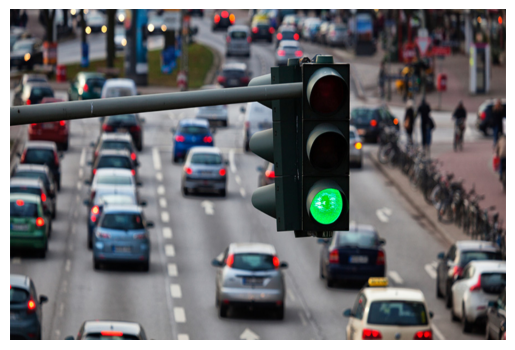

The image shows a busy street with a green traffic light, indicating that vehicles can proceed. While the weather is not explicitly depicted, the scene suggests a typical urban environment, possibly during the day. The presence of multiple cars and the clarity of the traffic light imply that visibility is good, which might indicate clear weather. However, without specific visual cues like rain, snow, or sunlight, it's difficult to provide a detailed description of the weather conditions.


In [24]:
local_image_path = "Parsons_PR.jpg" # Path to your image
local_message = [{"type": "text", "text": "describe the weather in this image"},
                 {"type": "image_url", "image_url": {"url": llm.encode_image(local_image_path)}},
                ]

img = Image.open(local_image_path)
plt.imshow(img)
plt.axis('off')  
plt.show()

response = llm.simple_query(human_message=local_message,system_prompt="Anwer the question")
print(response)

## Look at the cached data

In [26]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("langchain.db")
cursor = conn.cursor()

# List all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables:", tables)

# View one table
df = pd.read_sql_query("SELECT * FROM full_llm_cache LIMIT 10;", conn)
print(df.columns)
print(df)

conn.close()

Tables: [('full_llm_cache',), ('full_md5_llm_cache',)]
Index(['prompt', 'llm', 'idx', 'response'], dtype='object')
                                              prompt  \
0  [{"lc": 1, "type": "constructor", "id": ["lang...   
1  [{"lc": 1, "type": "constructor", "id": ["lang...   
2  [{"lc": 1, "type": "constructor", "id": ["lang...   

                                                 llm  idx  \
0  [('_type', 'together-chat'), ('max_tokens', 10...    0   
1  {"id": ["langchain", "chat_models", "openai", ...    0   
2  {"id": ["langchain", "chat_models", "openai", ...    0   

                                            response  
0  {"lc": 1, "type": "constructor", "id": ["langc...  
1  {"lc": 1, "type": "constructor", "id": ["langc...  
2  {"lc": 1, "type": "constructor", "id": ["langc...  
